In [ ]:
#| default_exp data_exploratory 

# Data Exploratory 

> In this section, we will highlight the main distribution properties of the various variables in our dataset.


In [ ]:
# |export
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path
from nbdev.showdoc import *

## Load datasets

In [ ]:
# |export
def load_data(path) -> pd.DataFrame:
    """Load a dataframe."""
    if isinstance(path, (str, Path)):
        df = pd.read_csv(path)
        if df.empty:
            raise ValueError("DataFrame Is empty")
    else:
        raise ValueError("Check your data path")
    return df

In [ ]:
path_train = "./Data/facebook_train.csv"
path_test = "./Data/facebook_test_no_target.csv"
train_data = load_data(path_train)
test_data = load_data(path_test)

## Data example

In [ ]:
# train data
train_data.head()

,CampaignTitle,Sector,Results,Coverage,Impressions,USD spent,StartDate,EndDate,Objetive
0,Liberta Voyages - Engagement avec une publicat...,Travel,214,1296,1328,1.45,2018-11-09,2018-11-17,Interaction
1,Liberta Voyages - Engagement avec une publicat...,Travel,931,4220,4299,1.22,2018-11-09,2018-11-17,Interaction
2,Publication : ‎« ‎الحمد لله و الصلاة و السلام ...,Travel,120,32321,46095,15.98,2018-12-06,2018-12-11,Messages
3,Publication : ‎« ‎ليبرتا تجمّد الأسعار للموسم ...,Travel,195,54121,80225,20.00,2018-12-06,2018-12-11,Messages
4,[09/11/2018] Promotion de Testour,Travel,520,15340,28771,7.73,2018-12-07,2018-12-11,Mentions J’aime une Page


In [ ]:
# test data
test_data.head()

,CampaignTitle,Sector,USD spent,StartDate,EndDate,Objetive
0,New Messages campaign,Travel,7.97,2022-01-26,2022-01-31,Messages
1,OMRA Engagement Audience Facebook,Travel,152.59,2022-01-26,2022-01-31,Interaction
2,OMRA Engagement Audience Retarg,Travel,156.72,2022-01-26,2022-01-31,Interaction
3,OMRA Engagement Audience Facebook,Travel,158.71,2022-01-26,2022-01-31,Interaction
4,OMRA Engagement Audience Retarg,Travel,162.85,2022-01-26,2022-01-31,Interaction


## Data summary and basic statistical details

In [ ]:
# |export
def data_summary(df) -> pd.DataFrame:
    """Summarize data"""
    print(df.info())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print(df.describe())

In [ ]:
data_summary(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CampaignTitle  888 non-null    object 
 1   Sector         888 non-null    object 
 2   Results        888 non-null    int64  
 3   Coverage       888 non-null    int64  
 4   Impressions    888 non-null    int64  
 5   USD spent      888 non-null    float64
 6   StartDate      888 non-null    object 
 7   EndDate        888 non-null    object 
 8   Objetive       888 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 62.6+ KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
             Results       Coverage   Impressions   USD spent
count     888.000000     888.000000  8.880000e+02  888.000000
mean     3951.175676   58322.235360  1.535936e+05   55.550270
std     13334.183167   83079.136151  3.254718e+05   88.199787
min         0.000000      23.000000  2.300000e+0

We can see here, in our training data , we dispose 6 independent variables : 
 
 - 3 categorical variables : CampaingTitle, Sector, Objetive
 - 2 date columns : StarDate, EndDate
 - 1 numerical variable : USD spent
 
and  3 target values : Results, Coverage, Impressions

In addition, in our dataset , we don't have missing values

## Data shape

In [ ]:
train_data.shape

(888, 9)

In [ ]:
test_data.shape

(223, 6)

## Categorical Variables unique Values

In [ ]:
# |export
def catego_unique_values(df):
    """Visualize unique values."""
    # exclude date and title columns
    no_columns = ["StartDate","EndDate","CampaignTitle"]
    # select only catego variables
    for col in df.select_dtypes(["object","string"]):
        if col not in no_columns:
            print(f'{df[col].nunique()} unique values for {col:-<20}  {df[col].unique()}')
            matplotlib.rcParams['figure.figsize'] = (12,6)
            sns.displot(df[col])
            plt.show()

we have 2 important qualitative Variables which are "Sector" and "Objective" and we present their different values.
One thing that stands out in these graphs is that "Ecommerce & Retail" is the most significant sector and "Interaction" and "Trafic" are the most targeted objectives for social media campaigns on Facebook.

4 unique values for Sector--------------  ['Travel' 'Ecommerce & Retail' 'B2B' 'Automotive']


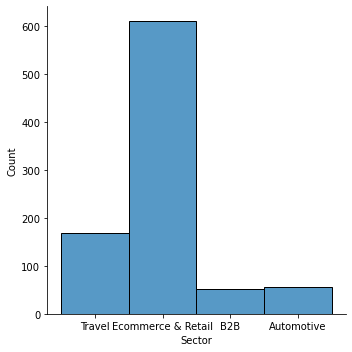

6 unique values for Objetive------------  ['Interaction' 'Messages' 'Mentions J’aime une Page'
 'Génération de prospects' 'Trafic' 'CONVERSIONS']


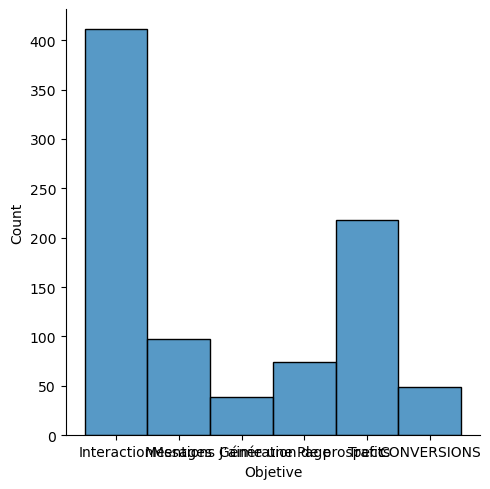

In [ ]:
catego_unique_values(train_data)

We grouped our data by objective and visualised how much money was spent on each. We may claim that most individuals spend their funds towards Interaction and Traffic.

In [ ]:
tab = train_data.groupby(["Objetive"]).agg({'USD spent': 'sum'})
tab = tab.sort_values(by = ['USD spent'], ascending=[False])
tab

,USD spent
Objetive,
Interaction,16313.26
Trafic,12174.92
Génération de prospects,6374.74
Messages,5237.41
Mentions J’aime une Page,4647.11
CONVERSIONS,4581.20


We grouped our data by Sector and visualised how much money was spent on each. We may assert that the Ecommerce & Retail and Travel industries invest the most in social media businesses. 

In [ ]:
tab = train_data.groupby(["Sector"]).agg({'USD spent': 'sum'})
tab = tab.sort_values(by = ['USD spent'], ascending=[False])
tab

,USD spent
Sector,
Ecommerce & Retail,29743.10
Travel,10823.75
Automotive,5243.90
B2B,3517.89


We grouped our data by sectors and visualised the amount spent on each objective for each one.

In [ ]:
tab = train_data.groupby(["Sector","Objetive"]).agg({'USD spent': 'sum'})
tab = tab.sort_values(by = ["Sector",'USD spent'], ascending=[True,False])
tab

USD spent
Sector             Objetive                           
Automotive         Trafic                      2910.27
                   Interaction                 1902.27
                   Génération de prospects      367.46
                   Messages                      63.90
B2B                Génération de prospects     3452.77
                   Interaction                   27.91
                   CONVERSIONS                   26.69
                   Messages                       6.92
                   Trafic                         3.26
                   Mentions J’aime une Page       0.34
Ecommerce & Retail Trafic                      8182.21
                   Interaction                 6947.05
                   CONVERSIONS                 4554.51
                   Mentions J’aime une Page    4338.05
                   Messages                    3269.12
                   Génération de prospects     2452.16
Travel             Interaction                 7436.03
                   Messages                    1897.47
                   Trafic                      1079.18
                   Mentions J’aime une Page     308.72
                   Génération de prospects      102.35

## Null values

In this section, we put up a function to visualise if we have empty values in each column, and we show it with a map.

In [ ]:
# |export
def check_null_values(df)-> None:
    """check null values for each column."""
    df_nulls = pd.DataFrame(df.isnull().sum(),columns=["Empty values"])
    print(df_nulls)
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

               Empty values
CampaignTitle             0
Sector                    0
Results                   0
Coverage                  0
Impressions               0
USD spent                 0
StartDate                 0
EndDate                   0
Objetive                  0


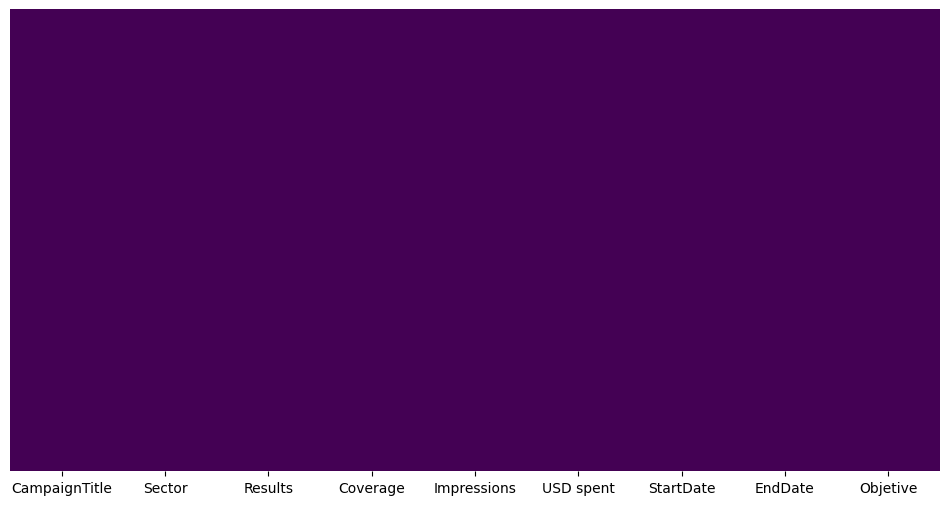

In [ ]:
check_null_values(train_data)

## Relationship Analysis

It is critical to visualise the correlation between different columns, as we can see that "coverage" and "Impressions," which are strongly associated (83 percent), are also positively correlated to "Usd expenditure" with 68% and 74%, respectively, implying that the more money we spend, the better our impressions and coverage.

In [ ]:
# |export
def correlation_view(df):
    """visualize correlation."""
    correlation = df.corr()
    sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)
    sns.pairplot(df)
    plt.show()
        

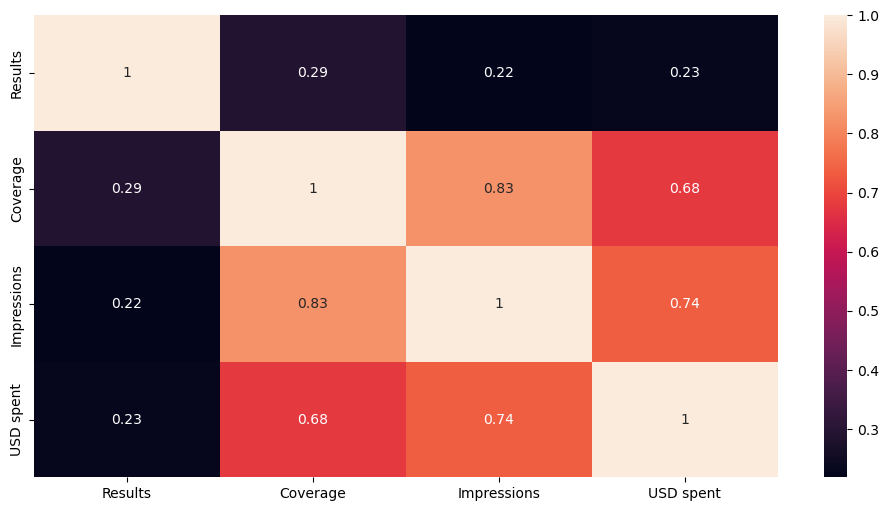

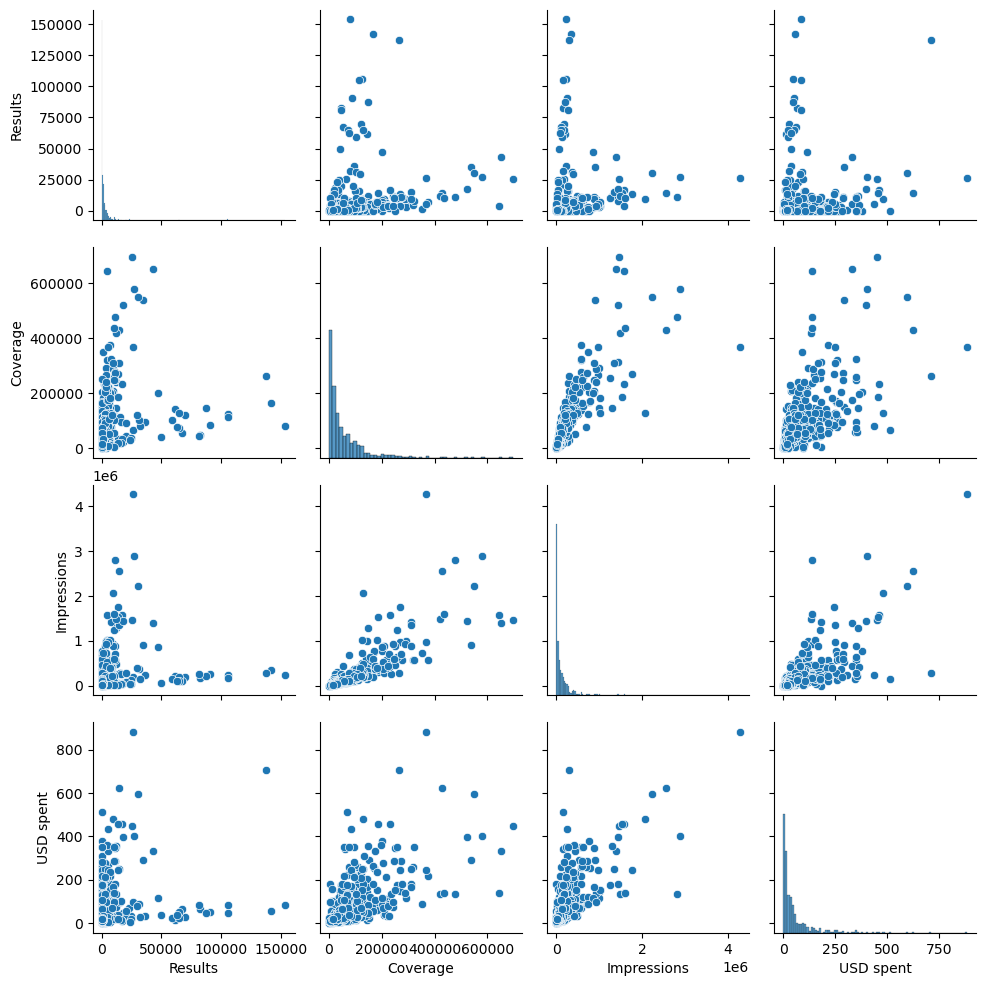

In [ ]:
correlation_view(train_data)

# Detect Outliers

In this analysis, we look for outliers, which are observations that are abnormally far from other values in a population's random sample.

<AxesSubplot:>

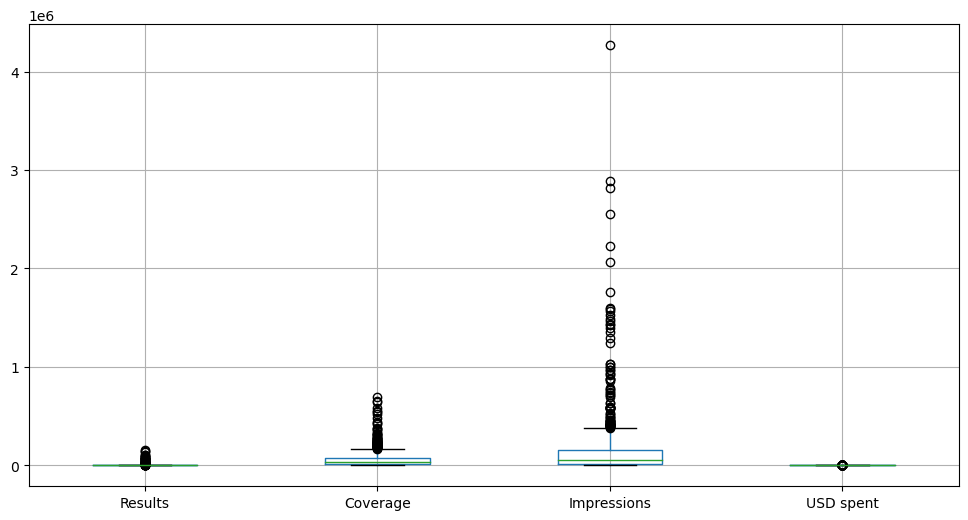

In [ ]:
train_data.boxplot()

As we can see here, All the numerical columns has some outliers that we have to eliminate.In such scenario, we usually eliminate data that are more than the 3rd quartile( 75% of data) and under the first quartile(25%), but as we dont have a lot of data we can define an outlier as any point that is outside the 2σ interval, which should encompass 95% of our data points.

# Target Values Distribution Before Transformations

We exhibit the distribution of the target values before to applying data transformations.

## Coverage Output

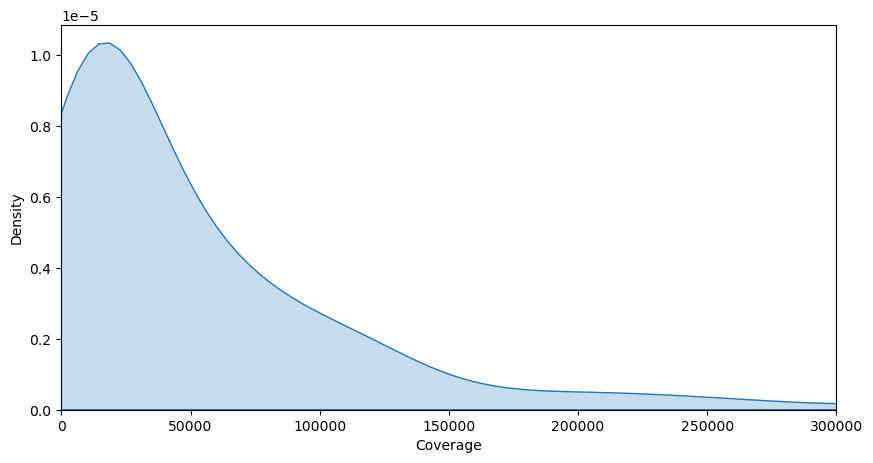

In [ ]:
plt.figure(figsize=(10, 5))
plt.xlim(0, 300000)
plt.xlabel("Coverage")
plt.ylabel("Density")
sns.kdeplot(train_data["Coverage"], shade=True)
plt.show()

## Results Output

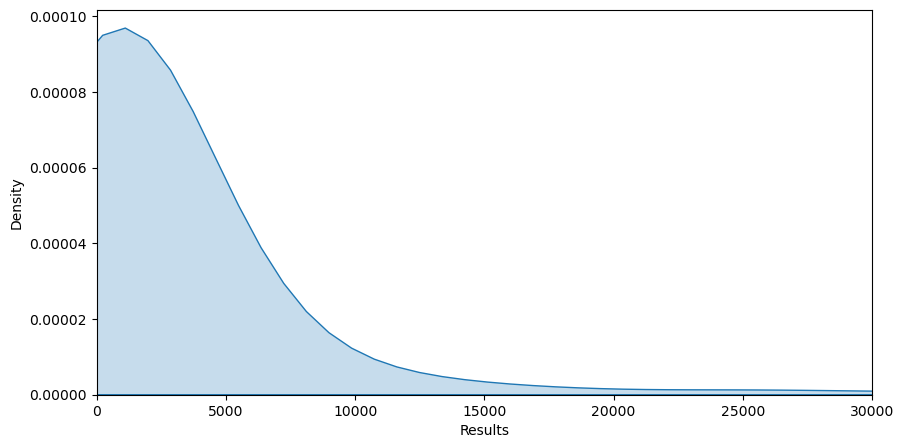

In [ ]:
plt.figure(figsize=(10, 5))
plt.xlim(0, 30000)
plt.xlabel("Results")
plt.ylabel("Density")
sns.kdeplot(train_data["Results"], shade=True)
plt.show()

## Impressions Output

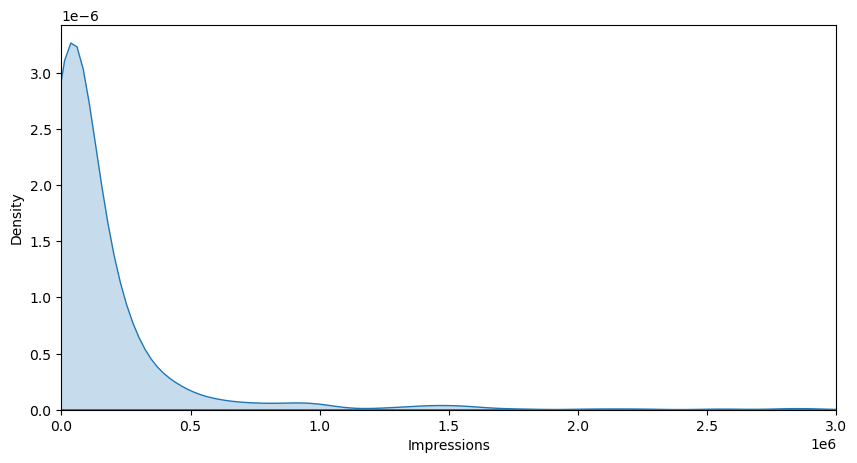

In [ ]:
plt.figure(figsize=(10, 5))
plt.xlim(0, 3000000)
plt.xlabel("Impressions")
plt.ylabel("Density")
sns.kdeplot(train_data["Impressions"], shade=True)
plt.show()